<a href="https://colab.research.google.com/github/Akshaya1408/Forest_Fire_Prediction_using_ml_and_flaks/blob/main/Handwrittendigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#to see length of training dataset
len(x_train)


11490434/11490434 [==============================] - 0s 0us/step


60000

In [3]:
len(x_test)



10000

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape


(10000, 28, 28)

In [6]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

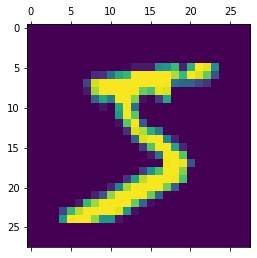

In [7]:
plt.matshow(x_train[0])

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1595 - accuracy: 0.9553 - val_loss: 0.1552 - val_accuracy: 0.9535
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1512 - accuracy: 0.9581 - val_loss: 0.1480 - val_accuracy: 0.9561
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1436 - accuracy: 0.9599 - val_loss: 0.1425 - val_accuracy: 0.9575
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.9622 - val_loss: 0.1365 - val_accuracy: 0.9585
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1304 - accuracy: 0.9641 - val_loss: 0.1319 - val_accuracy: 0.9599
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1246 - accuracy: 0.9658 - val_loss: 0.1281 - val_accuracy: 0.9609
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1194 - accuracy: 0.9673 - val_loss: 0.1223 - val_accuracy:

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1128 - accuracy: 0.9655
Loss=0.113
Accuracy=0.965


In [16]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9655
Loss=0.113
Accuracy=0.965


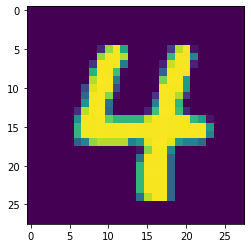

In [20]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [21]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is= 4


In [22]:
history.history??

In [23]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

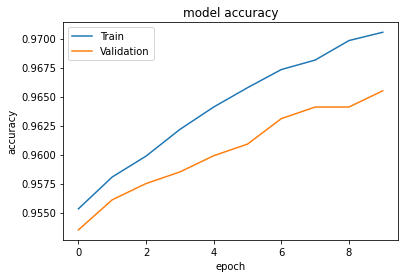

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

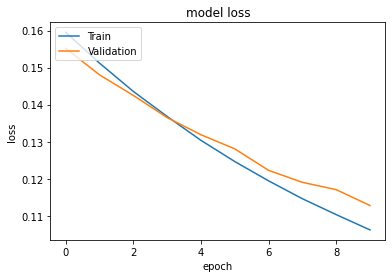

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

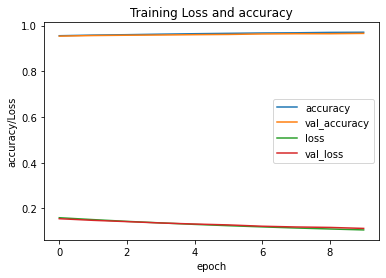

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()


In [27]:
keras_model_path='C:\\Users\\admin'
model.save(keras_model_path)